In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

df = pd.read_csv('data/heart-disease.csv')


In [2]:
#set X and y values
X = df.drop('target', axis = 1)
y = df[['target']]

In [3]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

### After splitting the data into training and testing it's time to build a machine learning model

### I'm going to try different models and compare their performances.
### We need 95% accuracy as it's a medical issue

### Try these models:
1. Logistic regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [4]:
#put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),"KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

#create a function to fit and score models

In [5]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    parameters:
        models: a dictionary of different Scikit-Learn machine learning models
        X_train: training data (no labels)
        X_test: testing data ( no labels)
        y_train: training labels
        y_test: testing labels
    """
    #in order to reproduce the results, set random seed
    np.random.seed(42)
    #make dictionary to keep model scores
    model_scores = {}

    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [6]:
models_accuracy = fit_and_score(models, X_train, X_test, y_train, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A

In [7]:
#the resulting models' performances
models_accuracy

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

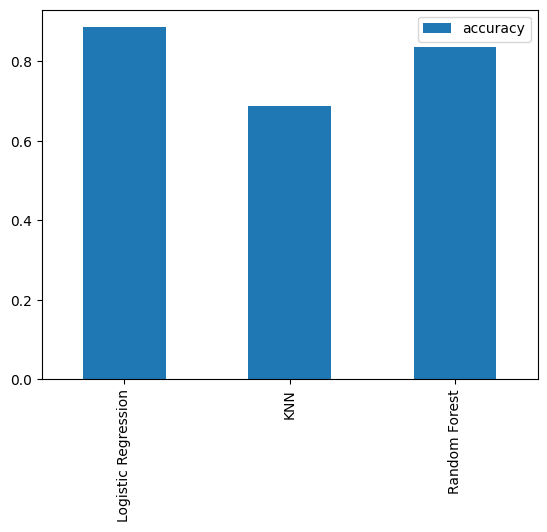

In [8]:
models_compare = pd.DataFrame(models_accuracy, index = ["accuracy"])
models_compare.T.plot.bar();